In [1]:
import pandas as pd
import numpy as np


airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')


flights['DATE_DAY'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])


flights = flights.merge(airports, how='right', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE').drop('IATA_CODE', axis=1)
flights = flights.merge(airlines, how='right', left_on='AIRLINE', right_on='IATA_CODE').drop('IATA_CODE', axis=1)




/var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_94189/4096464529.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


Аэропорт с минимальной задержкой вылета

In [2]:
a = flights.groupby('AIRPORT')['DEPARTURE_DELAY'].sum().sort_values().head(1)
b = flights.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().head(1)
print('Минимальная суммарная задержка рейса в аэропорте',a.index[0], 'составляет', round(a[0], 2), 'минут')
print('Минимальная средняя задержка вылета в аэропорте',b.index[0], 'составляет', round(b[0], 2), 'минут')

Минимальная суммарная задержка рейса в аэропорте Hilo International Airport составляет -4934.0 минут
Минимальная средняя задержка вылета в аэропорте Yakutat Airport составляет -6.29 минут


Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport


Если подойти с точки зрения количества рейсов в срок

<AxesSubplot:xlabel='AIRLINE_y'>

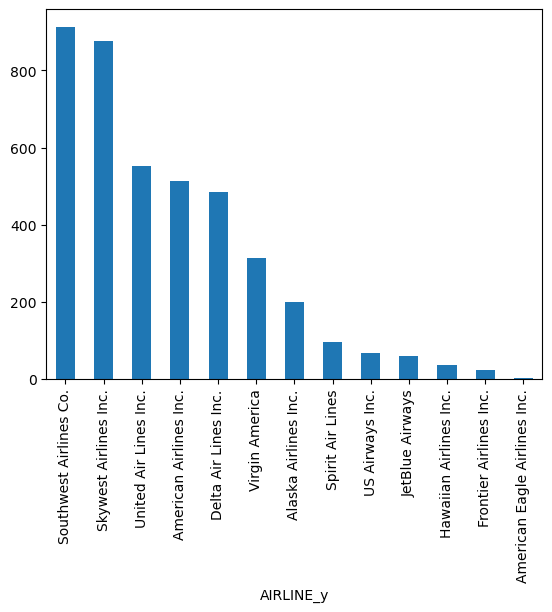

In [3]:
a = airports.query("AIRPORT == 'Los Angeles International Airport'").iloc[0]['IATA_CODE']
flights.query("DESTINATION_AIRPORT == @a & ARRIVAL_DELAY == 0").groupby('AIRLINE_y')['ARRIVAL_DELAY'].count().sort_values(ascending=False).plot.bar()


Если подойти с точки зрения минимального отклонения к рейсу

/var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_94189/270848764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['ARRIVAL_DELAY'] = b['ARRIVAL_DELAY'].abs()


<AxesSubplot:ylabel='AIRLINE_y'>

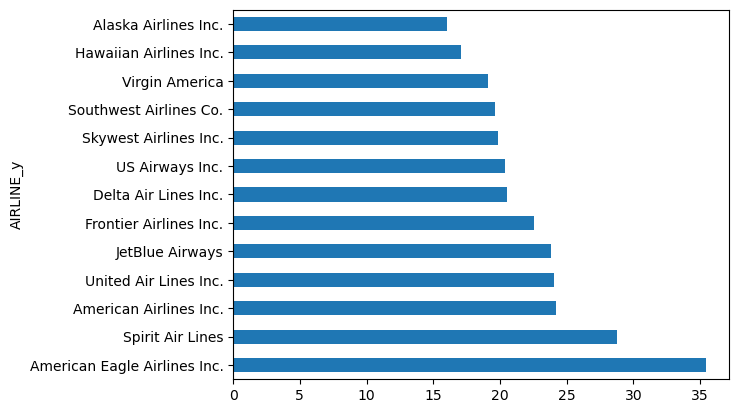

In [4]:

b = flights.query("DESTINATION_AIRPORT == @a")
b['ARRIVAL_DELAY'] = b['ARRIVAL_DELAY'].abs()
b.groupby('AIRLINE_y')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).plot.barh()

Найти аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)

<AxesSubplot:ylabel='AIRPORT'>

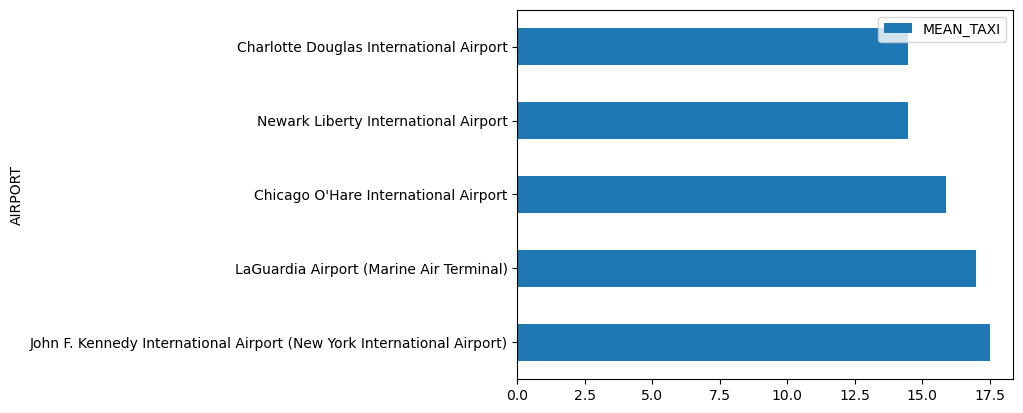

In [5]:
a = flights.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].sum().reset_index()
a_1 = flights.groupby('ORIGIN_AIRPORT')['DATE_DAY'].count().reset_index()
b = flights.groupby('DESTINATION_AIRPORT')['TAXI_IN'].sum().reset_index()
b_1 = flights.groupby('DESTINATION_AIRPORT')['DATE_DAY'].count().reset_index()
b_1['MEAN_TAXI'] = (a.TAXI_OUT+b.TAXI_IN)/(a_1.DATE_DAY+b_1.DATE_DAY)
b_1 = b_1.sort_values('MEAN_TAXI', ascending=False).drop('DATE_DAY', axis=1).head(5)
b_1 = b_1.merge(airports, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
b_1[['AIRPORT', 'MEAN_TAXI']].set_index('AIRPORT').plot.barh()